# Answer 4: MNIST Classification

In [26]:
%matplotlib inline
from __future__ import print_function
from itertools import count

import torch
import torch.nn as nn
import torch.autograd
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from timeit import default_timer as timer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [27]:
batch_size = 64
test_batch_size = 1000
epochs = 10
lr = 0.01

seed = 1
log_interval = 10

torch.cuda.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
        batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True)

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim = 1)

In [29]:
model = Net()

optimizer_sgd = torch.optim.SGD(model.parameters(), lr = lr, momentum = 0.9, nesterov = True)
optimizer_adagrad = torch.optim.Adagrad(model.parameters(), lr=lr)
optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=1)

def train(epoch,val):
    if val==1:
      optimizer = optimizer_sgd
    elif val==2:
      optimizer = optimizer_adagrad
    elif val==3:
      optimizer = optimizer_LBFGS

    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        
      data, target = Variable(data), Variable(target)
      optimizer.zero_grad()
      model_out = model(data)
      loss = F.nll_loss(model_out, target)
      loss.backward()
      train_loss += loss.data
      def closure():
        optimizer.zero_grad()
        #model_out = model(data)
        loss1 = F.nll_loss(model(data), target)
        loss1.backward()
        return loss1
      if val==1 or val==2:
        optimizer.step()
      elif val==3:
        optimizer.step(closure)
       
    train_loss /= len(train_loader.dataset)
    return train_loss

In [30]:
def test(val):
    # TODO: Test the model on the test-set and report the loss and accuracy.
    if val==1:
      optimizer = optimizer_sgd
    elif val==2:
      optimizer = optimizer_adagrad
    elif val==3:
      optimizer = optimizer_LBFGS

    test_loss = 0
    total_correct = 0
    total_incorrect = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        data,target = Variable(data), Variable(target)
        optimizer.zero_grad()
        model_out = model(data)
        
        # sum up batch loss
        curr_loss = F.nll_loss(model_out,target).data
        test_loss += curr_loss
        
        predictions = model_out.data.max(1)[1]
    
        # code to compute classification error
        correct = predictions.eq(target.data).sum()
        total_correct += correct
        total_incorrect += len(target.data) - correct
    
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, total_correct, len(test_loader.dataset),
        100. * total_correct / len(test_loader.dataset)))
    return test_loss

In [ ]:
train_arr_sgd = []
test_arr_sgd = []

train_arr_adagrad = []
test_arr_adagrad = []

train_arr_LBFGS = []
test_arr_LBFGS = []


for i in range(1,4):
  for epoch in range(1, epochs + 1):
    if i==1:
      print('SGD')
      print('Epoch-> {}'.format(epoch))
      train_arr_sgd.append([train(epoch,1)])
      test_arr_sgd.append([test(1)])

    if i==2:
      print('Adagrad')
      print('Epoch-> {}'.format(epoch))
      train_arr_adagrad.append([train(epoch,2)])
      test_arr_adagrad.append([test(2)])

    if i==3:
      print('LBFGS')
      print('Epoch-> {}'.format(epoch))
      train_arr_LBFGS.append([train(epoch,3)])
      test_arr_LBFGS.append([test(3)])


SGD
Epoch-> 1

Test set: Average loss: 0.0002, Accuracy: 9264/10000 (93%)

SGD
Epoch-> 2

Test set: Average loss: 0.0002, Accuracy: 9433/10000 (94%)

SGD
Epoch-> 3

Test set: Average loss: 0.0002, Accuracy: 9475/10000 (95%)

SGD
Epoch-> 4

Test set: Average loss: 0.0002, Accuracy: 9503/10000 (95%)

SGD
Epoch-> 5

Test set: Average loss: 0.0002, Accuracy: 9529/10000 (95%)

SGD
Epoch-> 6

Test set: Average loss: 0.0001, Accuracy: 9590/10000 (96%)

SGD
Epoch-> 7

Test set: Average loss: 0.0001, Accuracy: 9591/10000 (96%)

SGD
Epoch-> 8

Test set: Average loss: 0.0001, Accuracy: 9594/10000 (96%)

SGD
Epoch-> 9

Test set: Average loss: 0.0001, Accuracy: 9598/10000 (96%)

SGD
Epoch-> 10

Test set: Average loss: 0.0001, Accuracy: 9574/10000 (96%)

Adagrad
Epoch-> 1

Test set: Average loss: 0.0001, Accuracy: 9670/10000 (97%)

Adagrad
Epoch-> 2

Test set: Average loss: 0.0001, Accuracy: 9688/10000 (97%)

Adagrad
Epoch-> 3

Test set: Average loss: 0.0001, Accuracy: 9693/10000 (97%)

Adagrad
Epoch-> 4

Test set: Average loss: 0.0001, Accuracy: 9724/10000 (97%)

Adagrad
Epoch-> 5

Test set: Average loss: 0.0001, Accuracy: 9707/10000 (97%)

Adagrad
Epoch-> 6

Test set: Average loss: 0.0001, Accuracy: 9717/10000 (97%)

Adagrad
Epoch-> 7

Test set: Average loss: 0.0001, Accuracy: 9698/10000 (97%)

Adagrad
Epoch-> 8

Test set: Average loss: 0.0001, Accuracy: 9703/10000 (97%)

Adagrad
Epoch-> 9

Test set: Average loss: 0.0001, Accuracy: 9723/10000 (97%)

Adagrad
Epoch-> 10

Test set: Average loss: 0.0001, Accuracy: 9716/10000 (97%)

LBFGS
Epoch-> 1

Test set: Average loss: 0.0001, Accuracy: 9667/10000 (97%)

LBFGS
Epoch-> 2

Test set: Average loss: 0.0001, Accuracy: 9704/10000 (97%)

LBFGS
Epoch-> 3

Test set: Average loss: 0.0001, Accuracy: 9668/10000 (97%)

LBFGS
Epoch-> 4

Test set: Average loss: 0.0001, Accuracy: 9701/10000 (97%)

LBFGS
Epoch-> 5

Test set: Average loss: 0.0001, Accuracy: 9678/10000 (97%)

LBFGS
Epoch-> 6

Test set: Average loss: 0.0001, Accuracy: 9670/10000 (97%)

LBFGS
Epoch-> 7

Test set: Average loss: 0.0001, Accuracy: 9679/10000 (97%)

LBFGS
Epoch-> 8

Test set: Average loss: 0.0001, Accuracy: 9700/10000 (97%)

LBFGS
Epoch-> 9

Test set: Average loss: 0.0001, Accuracy: 9689/10000 (97%)

LBFGS
Epoch-> 10

Test set: Average loss: 0.0001, Accuracy: 9690/10000 (97%)

In [ ]:
# Plotting Losses
epochs_arr = [i for i in range(1,11)]

train_arr_sgd = np.array(train_arr_sgd).flatten()
test_arr_sgd = np.array(test_arr_sgd).flatten()

train_arr_adagrad = np.array(train_arr_adagrad).flatten()
test_arr_adagrad = np.array(test_arr_adagrad).flatten()

train_arr_LBFGS = np.array(train_arr_LBFGS).flatten()
test_arr_LBFGS = np.array(test_arr_LBFGS).flatten()

fig2 = plt.figure()
plt.plot(epochs_arr,train_arr_sgd,label="Train Loss")
plt.plot(epochs_arr,test_arr_sgd,label="Test Loss")
plt.legend()
plt.plot(epochs_arr,train_arr_sgd, 'ro')
plt.plot(epochs_arr,test_arr_sgd, 'gx')
fig2.suptitle('Error vs Epoch for SGD', fontsize=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(range(1,11))
plt.show()

fig3 = plt.figure()
plt.plot(epochs_arr,train_arr_adagrad,label="Train Loss")
plt.plot(epochs_arr,test_arr_adagrad,label="Test Loss")
plt.legend()
plt.plot(epochs_arr,train_arr_adagrad, 'ro')
plt.plot(epochs_arr,test_arr_adagrad, 'gx')
fig3.suptitle('Error vs Epoch for Adagrad', fontsize=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(range(1,11))
plt.show()

fig4 = plt.figure()
plt.plot(epochs_arr,train_arr_LBFGS,label="Train Loss")
plt.plot(epochs_arr,test_arr_LBFGS,label="Test Loss")
plt.legend()
plt.plot(epochs_arr,train_arr_LBFGS, 'ro')
plt.plot(epochs_arr,test_arr_LBFGS, 'gx')
fig4.suptitle('Error vs Epoch for LBFGS', fontsize=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(range(1,11))
plt.show()

## Part a) evaluate performance on the test set after every epoch, and plot both the test loss and training loss on the same plot

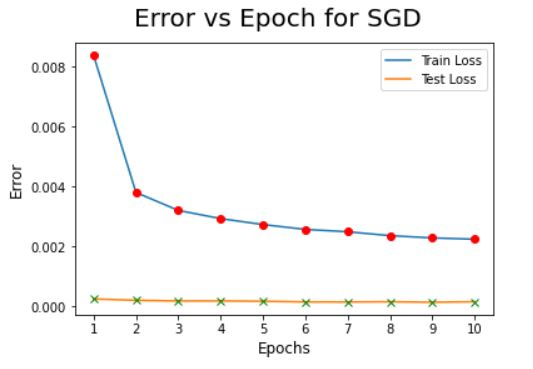

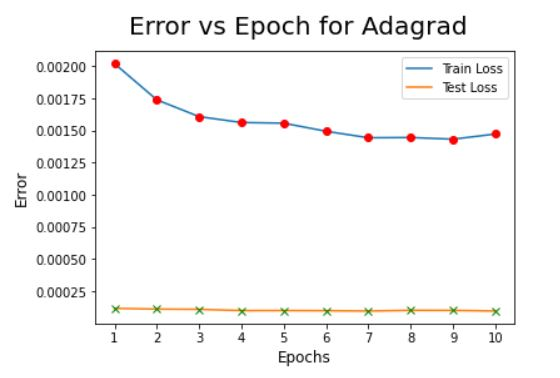

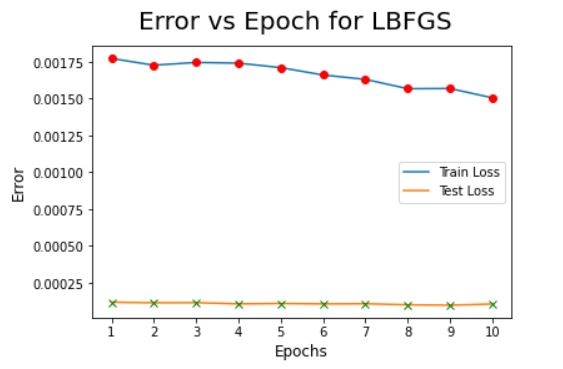


# Part b) Find a configuration that works well for SGD

**Best settings for SGD:**

Learning rate = 0.01

Momentum = 0.9

Nesterov = True

Batch_size = 64

Test Accuracy ~ 96%

**Explanation:** Learning rate should be high enough such that model converges fast and should be low enough to not overshoot from the solution. And momentum makes sure that we use previous gradient to find direction in next iteration.




# Part c) Attempt the same with two other optimizers, say Adagrad and L-BFGS

**Best settings for Adagrad:**

Learning rate = 0.01

Batch_size = 64

Test Accuracy ~ 96%

Explanation: Learning rate should be high enough such that model converges fast and should be low enough to not overshoot from the solution. And momentum makes sure that we use previous gradient to find direction in next iteration.

**Best settings for LBFGS:**

Learning rate = 1

Batch_size = 64

Test Accuracy ~ 97%